In [1]:
import plotly.express as px
from plotly.io import to_html
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('./cleaned_full_survey_data.csv')
df.head()

,id,What is your age?,What is your gender?,What is your current major or job field?,What is your current role?,How many years of programming experience do you have?,Languages_Used,Python_Community_Support,Python_Optimization_Challenges,Python_Learning_Challenges,...,Timestamp,Which language was the easiest for you to learn?,Which language has the most beginner-friendly documentation and learning resources?,"In your field, which language is the most commonly used?",Which language do you believe is most in demand for jobs?,Which language would you recommend for someone entering your industry?,Have you ever contributed to an open-source project in any of these languages?,What do you think is the biggest advantage of your preferred language?,Would you recommend learning another language? Why?,Have you ever had to switch from one of these languages to another due to project requirements? Why?
0,1,18-24,Female,data science is my current gig mostly using py...,Student,1-3 years,Python,5,slow speed and memory management issues can be...,understanding modules and imports initially to...,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
1,2,18-24,Female,i'm working in data science right now using py...,Student,1-3 years,Python,4,libraries not always optimized enough,initially grasping python's syntax and then th...,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
2,3,18-24,Female,software development professionally using java...,Student,Less than 1 year,Java,Not Applicable,Not Applicable,Not Applicable,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
3,4,18-24,Male,software engineering is my current gig i use p...,Student,1-3 years,Python,5,cython limitations and the global interpreter ...,list comprehension syntax takes some getting u...,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
4,5,18-24,Male,i'm working as a software engineer and use pyt...,Student,Less than 1 year,Python,5,gil limitations memory bottlenecks and libraries,honestly figuring out those complex libraries ...,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable


In [3]:
df.columns

Index(['id', 'What is your age?', 'What is your gender?',
       'What is your current major or job field?',
       'What is your current role?',
       'How many years of programming experience do you have?',
       'Languages_Used', 'Python_Community_Support',
       'Python_Optimization_Challenges', 'Python_Learning_Challenges',
       'Java_Community_Support', 'Java_Optimization_Challenges',
       'Java_Learning_Challenges', 'R_Community_Support',
       'R_Optimization_Challenges', 'R_Learning_Challenges',
       'Which language do you use most frequently?',
       '  Which language do you prefer for the following tasks?   [Data Science & Machine Learning]',
       '  Which language do you prefer for the following tasks?   [Web Development]',
       '  Which language do you prefer for the following tasks?   [Mobile App Development]',
       '  Which language do you prefer for the following tasks?   [Enterprise Applications]',
       '  Which language do you prefer for the followi

In [4]:
df.dtypes

id                                                                                                             object
What is your age?                                                                                              object
What is your gender?                                                                                           object
What is your current major or job field?                                                                       object
What is your current role?                                                                                     object
How many years of programming experience do you have?                                                          object
Languages_Used                                                                                                 object
Python_Community_Support                                                                                       object
Python_Optimization_Challenges                          

In [6]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
df = pd.read_csv('./cleaned_full_survey_data.csv')

# The image describes descriptive statistics, including mean, median, mode, standard deviation, and frequency distributions.
# We will calculate these for relevant numerical rating columns in the dataset.
# Identifying columns that contain numerical ratings (1-5 scale) or can be converted to numeric.

rating_columns = [
    'Python_Community_Support',
    'Python_Execution_Speed',
    'Python_Ease_of_Use',
    'Python_Documentation',
    'Python_Concurrency_Features',
    'Python_Readability',
    'Java_Community_Support',
    'Java_Execution_Speed',
    'Java_Ease_of_Use',
    'Java_Documentation',
    'Java_Concurrency_Features',
    'Java_Readability',
    'R_Community_Support',
    'R_Execution_Speed',
    'R_Ease_of_Use',
    'R_Documentation',
    'R_Concurrency_Features',
    'R_Readability'
]

# Replace non-numeric entries with NaN
for col in rating_columns:
    # Using regex=False to avoid potential FutureWarning regarding regex interpretation
    df[col] = df[col].replace(['Not Applicable', 'Not Applicable ', 'Not Applicable\n', '.', '..', '...'], np.nan, regex=False)
    # Attempt to convert to numeric, coercion handles errors by turning them to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Calculate descriptive statistics and store as a DataFrame
# Aggregating functions on the DataFrame subset
descriptive_stats_df = df[rating_columns].agg(
    ['mean', 'median', 'std', lambda x: x.mode().tolist() if not x.mode().empty else np.nan]
)
descriptive_stats_df = descriptive_stats_df.rename(index={'<lambda>': 'mode'})

# Calculate Frequency Distributions for rating columns that have non-NaN values
# Using a dictionary to store frequency distribution DataFrames with column names as keys
frequency_dfs = {}

for col in rating_columns:
    # Drop NaN values and check if there are any non-NaN values left
    non_nan_values = df[col].dropna()
    if not non_nan_values.empty:
        # Calculate frequencies
        freq_dist_series = non_nan_values.value_counts().sort_index()
        # Convert the Series to a DataFrame for consistency
        freq_dist_df = freq_dist_series.reset_index()
        freq_dist_df.columns = [col, 'Count']
        frequency_dfs[f'Frequency Distribution: {col}'] = freq_dist_df

# Print the descriptive statistics DataFrame
print("--- Descriptive Statistics DataFrame ---")
print(descriptive_stats_df.round(2))
print("\n") # Add a newline for separation

# --- Visualize Frequency Distributions using Plotly ---
print("--- Visualizing Frequency Distributions using Plotly ---")

for title, freq_df in frequency_dfs.items():
    # Extract the original column name from the title
    original_col_name = title.replace('Frequency Distribution: ', '')

    # Create a bar plot using Plotly Express
    fig = px.bar(freq_df,
                 x=original_col_name,
                 y='Count',
                 title=f'Distribution of {original_col_name}',
                 labels={original_col_name: "Rating (1-5)", "Count": "Count"},
                 text='Count') # Display text labels (counts) on the bars

    # Update layout for better readability
    fig.update_layout(xaxis_tickangle=-45) # Rotate x-axis labels if needed
    fig.update_xaxes(type='category') # Treat x-axis as categorical to ensure all labels are shown

    # Show the plot
    fig.show()

# Note: Frequency distributions are only visualized for columns with actual numerical ratings.
# The descriptive statistics table still shows NaN for columns with no valid numeric data.

--- Descriptive Statistics DataFrame ---
       Python_Community_Support Python_Execution_Speed Python_Ease_of_Use  \
mean                   4.196581                  3.256           2.973404   
median                      4.0                    3.0                3.0   
std                    0.788755               1.009227           1.396839   
mode                      [4.0]                  [4.0]              [2.0]   

       Python_Documentation Python_Concurrency_Features Python_Readability  \
mean               2.957447                    2.882979           3.138298   
median                  3.0                         3.0                3.0   
std                1.417348                    1.483286            1.43375   
mode                  [3.0]                       [1.0]              [5.0]   

       Java_Community_Support Java_Execution_Speed Java_Ease_of_Use  \
mean                 3.025641             3.185484         3.080645   
median                    3.0           

C:\Users\mohamed khalaf\AppData\Local\Temp\ipykernel_21600\4032365495.py:37: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

c:\Users\mohamed khalaf\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

c:\Users\mohamed khalaf\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

c:\Users\mohamed khalaf\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

c:\Users\mohamed khalaf\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

c:\Users\mohamed khalaf\AppData\Local

In [7]:
stats_df

,Metric,Python_Community_Support,Python_Ease_of_Use,Java_Community_Support,Java_Ease_of_Use
0,Python_Community_Support,4.2,4.0,4.0,0.8
1,Python_Ease_of_Use,3.0,3.0,2.0,1.4
2,Java_Community_Support,3.0,3.0,1.0,1.6
3,Java_Ease_of_Use,3.1,3.0,3.0,1.3


In [8]:
fig = px.histogram(df, x='What is your age?', nbins=20, title='Age Distribution')
fig.update_layout(bargap=0.1)
fig.show()


In [9]:
df2 = df.head(3)
df2

,id,What is your age?,What is your gender?,What is your current major or job field?,What is your current role?,How many years of programming experience do you have?,Languages_Used,Python_Community_Support,Python_Optimization_Challenges,Python_Learning_Challenges,...,Timestamp,Which language was the easiest for you to learn?,Which language has the most beginner-friendly documentation and learning resources?,"In your field, which language is the most commonly used?",Which language do you believe is most in demand for jobs?,Which language would you recommend for someone entering your industry?,Have you ever contributed to an open-source project in any of these languages?,What do you think is the biggest advantage of your preferred language?,Would you recommend learning another language? Why?,Have you ever had to switch from one of these languages to another due to project requirements? Why?
0,1,18-24,Female,data science is my current gig mostly using py...,Student,1-3 years,Python,5.0,slow speed and memory management issues can be...,understanding modules and imports initially to...,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
1,2,18-24,Female,i'm working in data science right now using py...,Student,1-3 years,Python,4.0,libraries not always optimized enough,initially grasping python's syntax and then th...,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
2,3,18-24,Female,software development professionally using java...,Student,Less than 1 year,Java,NaN,Not Applicable,Not Applicable,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable


In [10]:
df.head()

,id,What is your age?,What is your gender?,What is your current major or job field?,What is your current role?,How many years of programming experience do you have?,Languages_Used,Python_Community_Support,Python_Optimization_Challenges,Python_Learning_Challenges,...,Timestamp,Which language was the easiest for you to learn?,Which language has the most beginner-friendly documentation and learning resources?,"In your field, which language is the most commonly used?",Which language do you believe is most in demand for jobs?,Which language would you recommend for someone entering your industry?,Have you ever contributed to an open-source project in any of these languages?,What do you think is the biggest advantage of your preferred language?,Would you recommend learning another language? Why?,Have you ever had to switch from one of these languages to another due to project requirements? Why?
0,1,18-24,Female,data science is my current gig mostly using py...,Student,1-3 years,Python,5.0,slow speed and memory management issues can be...,understanding modules and imports initially to...,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
1,2,18-24,Female,i'm working in data science right now using py...,Student,1-3 years,Python,4.0,libraries not always optimized enough,initially grasping python's syntax and then th...,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
2,3,18-24,Female,software development professionally using java...,Student,Less than 1 year,Java,NaN,Not Applicable,Not Applicable,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
3,4,18-24,Male,software engineering is my current gig i use p...,Student,1-3 years,Python,5.0,cython limitations and the global interpreter ...,list comprehension syntax takes some getting u...,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
4,5,18-24,Male,i'm working as a software engineer and use pyt...,Student,Less than 1 year,Python,5.0,gil limitations memory bottlenecks and libraries,honestly figuring out those complex libraries ...,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable


In [11]:
df.columns

Index(['id', 'What is your age?', 'What is your gender?',
       'What is your current major or job field?',
       'What is your current role?',
       'How many years of programming experience do you have?',
       'Languages_Used', 'Python_Community_Support',
       'Python_Optimization_Challenges', 'Python_Learning_Challenges',
       'Java_Community_Support', 'Java_Optimization_Challenges',
       'Java_Learning_Challenges', 'R_Community_Support',
       'R_Optimization_Challenges', 'R_Learning_Challenges',
       'Which language do you use most frequently?',
       '  Which language do you prefer for the following tasks?   [Data Science & Machine Learning]',
       '  Which language do you prefer for the following tasks?   [Web Development]',
       '  Which language do you prefer for the following tasks?   [Mobile App Development]',
       '  Which language do you prefer for the following tasks?   [Enterprise Applications]',
       '  Which language do you prefer for the followi

In [12]:
genders_Series = df[['What is your gender?']].value_counts()

genders_df = genders_Series.to_frame()
genders_df = genders_df.reset_index()
# genders_df

fig = px.pie(genders_df,names= 'What is your gender?',values= 'count')
fig.show()

In [13]:
age_Series = df['What is your age?'].value_counts().reset_index()
age_Series.columns = ['Age Category', 'count'] 

fig_Age_Dist = px.bar(age_Series,
             x='Age Category',
             y='count',
             labels={'Age Category': 'Age Category', 'count': 'Frequency'},
             title='Age Distribution')
fig.show()

In [14]:
roles_Series = df[['What is your current role?']].value_counts().reset_index()
print(roles_Series)

fig_roles = fig = px.bar(data_frame=roles_Series, x='count', y='What is your current role?', orientation='h', title="Roles Distribution")
fig.show()


  What is your current role?  count
0                    Student    282
1             Data Scientist     25
2                 Researcher      3
3                    Analyst      2


In [15]:
exp = df[['How many years of programming experience do you have?']].value_counts().reset_index()
exp.columns = ['exp','count']

fig = px.bar(exp, 
             x='exp', 
             y='count',
             title='Programming Experience Distribution',
             labels={'exp': 'Programming Experience', 'count': 'Count'},
             color='count',
             color_continuous_scale='Blues')

fig.update_layout(xaxis_tickangle=-15)
fig.show()

In [16]:
major = df[['What is your current major or job field?']]
print(major)

              What is your current major or job field?
0    data science is my current gig mostly using py...
1    i'm working in data science right now using py...
2    software development professionally using java...
3    software engineering is my current gig i use p...
4    i'm working as a software engineer and use pyt...
..                                                 ...
307                                     AI specialist 
308                                       Math Teacher
309                                    Cyber security 
310                                       Data Science
311                         Computer and Data Science 

[312 rows x 1 columns]


In [17]:
major_keywords = {
    "data science": "data",
    "data scientist": "data",
    "software engineering": "software",
    "software engineer": "software",
    "software development": "software",
    "developer": "software",
    "programmer": "software",
    "web development": "software",
    "frontend": "software",
    "backend": "software",
    "AI specialist": "ai",
    "machine learning": "ai",
    "cyber security": "security",
    "network engineer": "networking",
    "computer science": "software",
    "math teacher": "education",
    "teacher": "education",
    "engineer": "engineering"
}

major_keywords = {k.lower(): v for k, v in major_keywords.items()}

def classify_role(text):
    text = str(text).lower()
    for key in major_keywords:
        if key in text:
            return major_keywords[key]
    return "other"  

major['major'] = major['What is your current major or job field?'].apply(classify_role)

major

C:\Users\mohamed khalaf\AppData\Local\Temp\ipykernel_21600\3081210872.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,What is your current major or job field?,major
0,data science is my current gig mostly using py...,data
1,i'm working in data science right now using py...,data
2,software development professionally using java...,software
3,software engineering is my current gig i use p...,software
4,i'm working as a software engineer and use pyt...,software
...,...,...
307,AI specialist,ai
308,Math Teacher,education
309,Cyber security,security
310,Data Science,data


In [18]:
major_Series = major[['major']].value_counts()

major_df = major_Series.to_frame()
major_df = major_df.reset_index()
major_df

fig = px.pie(major_df,names= 'major',values= 'count')
fig.show()

In [19]:
lang_used = df[['Languages_Used']].value_counts().reset_index()
lang_used

fig = px.pie(lang_used,names='Languages_Used', values='count')
fig.show()

In [20]:
df.head(1)

,id,What is your age?,What is your gender?,What is your current major or job field?,What is your current role?,How many years of programming experience do you have?,Languages_Used,Python_Community_Support,Python_Optimization_Challenges,Python_Learning_Challenges,...,Timestamp,Which language was the easiest for you to learn?,Which language has the most beginner-friendly documentation and learning resources?,"In your field, which language is the most commonly used?",Which language do you believe is most in demand for jobs?,Which language would you recommend for someone entering your industry?,Have you ever contributed to an open-source project in any of these languages?,What do you think is the biggest advantage of your preferred language?,Would you recommend learning another language? Why?,Have you ever had to switch from one of these languages to another due to project requirements? Why?
0,1,18-24,Female,data science is my current gig mostly using py...,Student,1-3 years,Python,5.0,slow speed and memory management issues can be...,understanding modules and imports initially to...,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable


In [21]:
gender_exp = df[['What is your gender?', 'How many years of programming experience do you have?',]]
gender_exp.columns = ['Gender','Experience']
fig = px.box(
    gender_exp,
    x='Gender',
    y='Experience',
    color='Gender',
)
fig.show()


In [22]:
job_lang = df[['What is your current role?','Languages_Used']]
job_lang.columns = ['Role','Lang']

lang_counts = job_lang.groupby(['Role', 'Lang']).size().reset_index(name='Count')

lang_pivot = lang_counts.pivot(index='Role', columns='Lang', values='Count').fillna(0)
lang_pivot = lang_pivot.reset_index()

lang_long = lang_pivot.melt(id_vars='Role', var_name='Language', value_name='Count')

# Plot
fig = px.bar(
    lang_long,
    x='Role',
    y='Count',
    color='Language',
    title='Most Used Programming Languages by Role',
    labels={'Count': 'Number of Mentions', 'Role': 'Job Role'},
)

fig.update_layout(barmode='stack', xaxis_tickangle=-45)
fig.show()



In [23]:
role_exp = df[['What is your current role?', 'How many years of programming experience do you have?']]
role_exp.columns = ['Role', 'Exp']

def parse_experience(exp):
    if pd.isna(exp):
        return None
    exp = exp.strip().lower().replace("years", "").strip()
    
    if '+' in exp:
        return float(exp.replace('+', '').strip())
    elif '-' in exp:
        parts = exp.split('-')
        return (float(parts[0]) + float(parts[1])) / 2
    else:
        try:
            return float(exp)
        except:
            return None

role_exp['Exp_numeric'] = role_exp['Exp'].apply(parse_experience)

avg_exp_by_role = role_exp.groupby('Role')['Exp_numeric'].mean().reset_index()

fig = px.bar(
    avg_exp_by_role,
    x='Role',
    y='Exp_numeric',
    title='Average Programming Experience by Role',
    labels={'Role': 'Job Role', 'Exp_numeric': 'Avg. Years of Experience'}
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

C:\Users\mohamed khalaf\AppData\Local\Temp\ipykernel_21600\1652715518.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
df.head(5)

,id,What is your age?,What is your gender?,What is your current major or job field?,What is your current role?,How many years of programming experience do you have?,Languages_Used,Python_Community_Support,Python_Optimization_Challenges,Python_Learning_Challenges,...,Timestamp,Which language was the easiest for you to learn?,Which language has the most beginner-friendly documentation and learning resources?,"In your field, which language is the most commonly used?",Which language do you believe is most in demand for jobs?,Which language would you recommend for someone entering your industry?,Have you ever contributed to an open-source project in any of these languages?,What do you think is the biggest advantage of your preferred language?,Would you recommend learning another language? Why?,Have you ever had to switch from one of these languages to another due to project requirements? Why?
0,1,18-24,Female,data science is my current gig mostly using py...,Student,1-3 years,Python,5.0,slow speed and memory management issues can be...,understanding modules and imports initially to...,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
1,2,18-24,Female,i'm working in data science right now using py...,Student,1-3 years,Python,4.0,libraries not always optimized enough,initially grasping python's syntax and then th...,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
2,3,18-24,Female,software development professionally using java...,Student,Less than 1 year,Java,NaN,Not Applicable,Not Applicable,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
3,4,18-24,Male,software engineering is my current gig i use p...,Student,1-3 years,Python,5.0,cython limitations and the global interpreter ...,list comprehension syntax takes some getting u...,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
4,5,18-24,Male,i'm working as a software engineer and use pyt...,Student,Less than 1 year,Python,5.0,gil limitations memory bottlenecks and libraries,honestly figuring out those complex libraries ...,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable


In [25]:
lang_used = df[['Which language do you use most frequently?']].value_counts().reset_index()
lang_used

fig = px.pie(lang_used,names='Which language do you use most frequently?', values='count')
fig.show()

In [26]:
print(df.columns)
print(df.dtypes)

Index(['id', 'What is your age?', 'What is your gender?',
       'What is your current major or job field?',
       'What is your current role?',
       'How many years of programming experience do you have?',
       'Languages_Used', 'Python_Community_Support',
       'Python_Optimization_Challenges', 'Python_Learning_Challenges',
       'Java_Community_Support', 'Java_Optimization_Challenges',
       'Java_Learning_Challenges', 'R_Community_Support',
       'R_Optimization_Challenges', 'R_Learning_Challenges',
       'Which language do you use most frequently?',
       '  Which language do you prefer for the following tasks?   [Data Science & Machine Learning]',
       '  Which language do you prefer for the following tasks?   [Web Development]',
       '  Which language do you prefer for the following tasks?   [Mobile App Development]',
       '  Which language do you prefer for the following tasks?   [Enterprise Applications]',
       '  Which language do you prefer for the followi

In [27]:
lang_used_ds = df[['  Which language do you prefer for the following tasks?   [Data Science & Machine Learning]']].value_counts().reset_index()
lang_used_ds.columns = ['lang','count']


fig = px.pie(lang_used_ds,names='lang', values='count')
fig.show()

In [28]:
lang_used_web = df[['  Which language do you prefer for the following tasks?   [Web Development]']].value_counts().reset_index()
lang_used_web.columns = ['lang','count']


fig = px.pie(lang_used_web,names='lang', values='count')
fig.show()

In [29]:
lang_used_web = df[['  Which language do you prefer for the following tasks?   [Enterprise Applications]']].value_counts().reset_index()
lang_used_web.columns = ['lang','count']


fig = px.pie(lang_used_web,names='lang', values='count')
fig.show()

In [30]:
lang_used_stat = df[['  Which language do you prefer for the following tasks?   [Statistical Analysis]']].value_counts().reset_index()
lang_used_stat.columns = ['lang','count']


fig = px.pie(lang_used_stat,names='lang', values='count')
fig.show()

In [31]:
df.columns

Index(['id', 'What is your age?', 'What is your gender?',
       'What is your current major or job field?',
       'What is your current role?',
       'How many years of programming experience do you have?',
       'Languages_Used', 'Python_Community_Support',
       'Python_Optimization_Challenges', 'Python_Learning_Challenges',
       'Java_Community_Support', 'Java_Optimization_Challenges',
       'Java_Learning_Challenges', 'R_Community_Support',
       'R_Optimization_Challenges', 'R_Learning_Challenges',
       'Which language do you use most frequently?',
       '  Which language do you prefer for the following tasks?   [Data Science & Machine Learning]',
       '  Which language do you prefer for the following tasks?   [Web Development]',
       '  Which language do you prefer for the following tasks?   [Mobile App Development]',
       '  Which language do you prefer for the following tasks?   [Enterprise Applications]',
       '  Which language do you prefer for the followi

In [32]:
switch_between_langs = df[['How often do you switch between these languages?']].value_counts().reset_index()
switch_between_langs.columns = ['lang','count']


fig = px.bar(switch_between_langs, 
             x='lang', 
             y='count',
             title='switch between these languages',
             labels={'lang': 'from 1 to 5', 'count': 'Count'}
             )
fig.update_layout(xaxis_tickangle=-15)
fig.show()

In [33]:
task = df[['Which language do you perceive as the most efficient for your tasks?']].value_counts().reset_index()
task.columns = ['lang','count']


fig = px.bar(task, 
             x='lang', 
             y='count',
             title='Most Efficient For Your Tasks',
             labels={'lang': '', 'count': 'Count'}
             )
fig.update_layout(xaxis_tickangle=-15)
fig.show()

In [34]:
future = df[['Which language do you think will dominate the job market in the next 5 years?']].value_counts().reset_index()
future.columns = ['lang','count']


fig = px.bar(future, 
             x='lang', 
             y='count',
             title='What Is The Language That Will Dominate The Job Market In The Next 5 Years ',
             labels={'lang': '', 'count': 'Count'}
             )
fig.update_layout(xaxis_tickangle=-15)
fig.show()

In [35]:
easiest = df[['Which language was the easiest for you to learn?']].value_counts().reset_index()
easiest.columns = ['lang','count']

fig = px.pie(easiest,names='lang', values='count')
fig.show()

In [36]:
resourses = df[['Which language has the most beginner-friendly documentation and learning resources?']].value_counts().reset_index()
resourses.columns = ['lang','count']

fig = px.pie(resourses,names='lang', values='count')
fig.show()

In [37]:
resourses = df[['Which language do you believe is most in demand for jobs?']].value_counts().reset_index()
resourses.columns = ['lang','count']

fig = px.pie(resourses,names='lang', values='count')
fig.show()

In [38]:
contributing = df[['Have you ever contributed to an open-source project in any of these languages?']].value_counts().reset_index()
contributing.columns = ['lang','count']

fig = px.pie(contributing,names='lang', values='count')
fig.show()

In [39]:
def create_bar_chart(df, column, title, color_discrete_sequence=None, category_orders=None):
    """Creates a bar chart for a given column."""
    counts = df[column].value_counts()
    fig = px.bar(x=counts.index, y=counts.values,
                 labels={'x': column, 'y': 'Count'},
                 title=title,
                 color=counts.index if color_discrete_sequence is None else counts.index,
                 color_discrete_sequence=color_discrete_sequence,
                 category_orders=category_orders)  #added category_orders

    fig.update_layout(template="plotly_white")
    return fig

def create_sunburst_chart(df, path, title):
    """Creates a sunburst chart."""
    fig = px.sunburst(df, path=path, title=title)
    fig.update_layout(template="plotly_white")
    return fig

def create_histogram(df, column, title, color=None):
    """Creates a histogram."""
    fig = px.histogram(df, x=column, title=title, color=color)
    fig.update_layout(template="plotly_white")
    return fig

def create_scatter_plot(df, x_column, y_column, color_column, title):
    """Creates a scatter plot."""
    fig = px.scatter(df, x=x_column, y=y_column, color=color_column, title=title)
    fig.update_layout(template="plotly_white")
    return fig

In [40]:
gender_language_fig = px.histogram(df, x='Which language do you use most frequently?', color='What is your gender?', barmode='group',
                                title='Gender vs. Most Frequent Language')
gender_language_fig.update_layout(template="plotly_white")
gender_language_fig.show()

In [41]:
fig = px.histogram(df, x='What is your age?', color='Which language do you use most frequently?',
                   title='Age Distribution by Primary Language',
                   category_orders={'Which language do you use most frequently?': ['Python', 'Java', 'R']})
fig.update_layout(barmode='group')
fig.show()

In [42]:
fig = px.pie(df, names='What is your gender?',
             title='Gender Distribution by Primary Language',
             facet_col='Which language do you use most frequently?')
fig.show()

In [43]:
fig = px.box(df, x='Which language do you use most frequently?', y='How many years of programming experience do you have?',
             title='Years of Programming Experience by Primary Language',
             color='Which language do you use most frequently?')
fig.update_yaxes(type='category')
fig.show()

In [44]:
tasks = [
    '  Which language do you prefer for the following tasks?   [Data Science & Machine Learning]',
    '  Which language do you prefer for the following tasks?   [Web Development]',
    '  Which language do you prefer for the following tasks?   [Mobile App Development]',
    '  Which language do you prefer for the following tasks?   [Enterprise Applications]',
    '  Which language do you prefer for the following tasks?   [Statistical Analysis]'
]

task_data = []
for task in tasks:
    counts = df[task].value_counts().reset_index()
    counts['task'] = task.split('[')[1].split(']')[0]
    task_data.append(counts)
    
task_df = pd.concat(task_data)

In [45]:
task_df

,Which language do you prefer for the following tasks? [Data Science & Machine Learning],count,task,Which language do you prefer for the following tasks? [Web Development],Which language do you prefer for the following tasks? [Mobile App Development],Which language do you prefer for the following tasks? [Enterprise Applications],Which language do you prefer for the following tasks? [Statistical Analysis]
0,Python,256,Data Science & Machine Learning,NaN,NaN,NaN,NaN
1,Java,37,Data Science & Machine Learning,NaN,NaN,NaN,NaN
2,R,18,Data Science & Machine Learning,NaN,NaN,NaN,NaN
3,Not Applicable,1,Data Science & Machine Learning,NaN,NaN,NaN,NaN
0,NaN,146,Web Development,Python,NaN,NaN,NaN
1,NaN,129,Web Development,Java,NaN,NaN,NaN
2,NaN,26,Web Development,R,NaN,NaN,NaN
3,NaN,11,Web Development,Not Applicable,NaN,NaN,NaN
0,NaN,166,Mobile App Development,NaN,Java,NaN,NaN
1,NaN,126,Mobile App Development,NaN,Python,NaN,NaN


In [46]:
df.columns

Index(['id', 'What is your age?', 'What is your gender?',
       'What is your current major or job field?',
       'What is your current role?',
       'How many years of programming experience do you have?',
       'Languages_Used', 'Python_Community_Support',
       'Python_Optimization_Challenges', 'Python_Learning_Challenges',
       'Java_Community_Support', 'Java_Optimization_Challenges',
       'Java_Learning_Challenges', 'R_Community_Support',
       'R_Optimization_Challenges', 'R_Learning_Challenges',
       'Which language do you use most frequently?',
       '  Which language do you prefer for the following tasks?   [Data Science & Machine Learning]',
       '  Which language do you prefer for the following tasks?   [Web Development]',
       '  Which language do you prefer for the following tasks?   [Mobile App Development]',
       '  Which language do you prefer for the following tasks?   [Enterprise Applications]',
       '  Which language do you prefer for the followi

In [47]:
def get_language(row):
    task = row['task']
    if task == 'Data Science & Machine Learning':
        return row['  Which language do you prefer for the following tasks?   [Data Science & Machine Learning]']
    elif task == 'Web Development':
        return row['  Which language do you prefer for the following tasks?   [Web Development]']
    elif task == 'Mobile App Development':
        return row['  Which language do you prefer for the following tasks?   [Mobile App Development]']
    elif task == 'Enterprise Applications':
        return row['  Which language do you prefer for the following tasks?   [Enterprise Applications]']
    elif task == 'Statistical Analysis':
        return row['  Which language do you prefer for the following tasks?   [Statistical Analysis]']
    else:
        return None  # Handle other tasks if needed
    
task_df['lang'] = task_df.apply(get_language, axis=1)

# Print the DataFrame with the new 'lang' column
task_df

,Which language do you prefer for the following tasks? [Data Science & Machine Learning],count,task,Which language do you prefer for the following tasks? [Web Development],Which language do you prefer for the following tasks? [Mobile App Development],Which language do you prefer for the following tasks? [Enterprise Applications],Which language do you prefer for the following tasks? [Statistical Analysis],lang
0,Python,256,Data Science & Machine Learning,NaN,NaN,NaN,NaN,Python
1,Java,37,Data Science & Machine Learning,NaN,NaN,NaN,NaN,Java
2,R,18,Data Science & Machine Learning,NaN,NaN,NaN,NaN,R
3,Not Applicable,1,Data Science & Machine Learning,NaN,NaN,NaN,NaN,Not Applicable
0,NaN,146,Web Development,Python,NaN,NaN,NaN,Python
1,NaN,129,Web Development,Java,NaN,NaN,NaN,Java
2,NaN,26,Web Development,R,NaN,NaN,NaN,R
3,NaN,11,Web Development,Not Applicable,NaN,NaN,NaN,Not Applicable
0,NaN,166,Mobile App Development,NaN,Java,NaN,NaN,Java
1,NaN,126,Mobile App Development,NaN,Python,NaN,NaN,Python


In [48]:
task_df

,Which language do you prefer for the following tasks? [Data Science & Machine Learning],count,task,Which language do you prefer for the following tasks? [Web Development],Which language do you prefer for the following tasks? [Mobile App Development],Which language do you prefer for the following tasks? [Enterprise Applications],Which language do you prefer for the following tasks? [Statistical Analysis],lang
0,Python,256,Data Science & Machine Learning,NaN,NaN,NaN,NaN,Python
1,Java,37,Data Science & Machine Learning,NaN,NaN,NaN,NaN,Java
2,R,18,Data Science & Machine Learning,NaN,NaN,NaN,NaN,R
3,Not Applicable,1,Data Science & Machine Learning,NaN,NaN,NaN,NaN,Not Applicable
0,NaN,146,Web Development,Python,NaN,NaN,NaN,Python
1,NaN,129,Web Development,Java,NaN,NaN,NaN,Java
2,NaN,26,Web Development,R,NaN,NaN,NaN,R
3,NaN,11,Web Development,Not Applicable,NaN,NaN,NaN,Not Applicable
0,NaN,166,Mobile App Development,NaN,Java,NaN,NaN,Java
1,NaN,126,Mobile App Development,NaN,Python,NaN,NaN,Python


In [49]:
fig = px.bar(task_df, x='task', y='count', color= 'lang',
             title='Language Preference by Task Type',
             labels={'count': 'Preference Count', 'index': 'Language', 'task': 'Task Type'})
fig.show()

In [50]:
df.columns

Index(['id', 'What is your age?', 'What is your gender?',
       'What is your current major or job field?',
       'What is your current role?',
       'How many years of programming experience do you have?',
       'Languages_Used', 'Python_Community_Support',
       'Python_Optimization_Challenges', 'Python_Learning_Challenges',
       'Java_Community_Support', 'Java_Optimization_Challenges',
       'Java_Learning_Challenges', 'R_Community_Support',
       'R_Optimization_Challenges', 'R_Learning_Challenges',
       'Which language do you use most frequently?',
       '  Which language do you prefer for the following tasks?   [Data Science & Machine Learning]',
       '  Which language do you prefer for the following tasks?   [Web Development]',
       '  Which language do you prefer for the following tasks?   [Mobile App Development]',
       '  Which language do you prefer for the following tasks?   [Enterprise Applications]',
       '  Which language do you prefer for the followi

In [51]:
df

,id,What is your age?,What is your gender?,What is your current major or job field?,What is your current role?,How many years of programming experience do you have?,Languages_Used,Python_Community_Support,Python_Optimization_Challenges,Python_Learning_Challenges,...,Timestamp,Which language was the easiest for you to learn?,Which language has the most beginner-friendly documentation and learning resources?,"In your field, which language is the most commonly used?",Which language do you believe is most in demand for jobs?,Which language would you recommend for someone entering your industry?,Have you ever contributed to an open-source project in any of these languages?,What do you think is the biggest advantage of your preferred language?,Would you recommend learning another language? Why?,Have you ever had to switch from one of these languages to another due to project requirements? Why?
0,1,18-24,Female,data science is my current gig mostly using py...,Student,1-3 years,Python,5.0,slow speed and memory management issues can be...,understanding modules and imports initially to...,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
1,2,18-24,Female,i'm working in data science right now using py...,Student,1-3 years,Python,4.0,libraries not always optimized enough,initially grasping python's syntax and then th...,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
2,3,18-24,Female,software development professionally using java...,Student,Less than 1 year,Java,NaN,Not Applicable,Not Applicable,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
3,4,18-24,Male,software engineering is my current gig i use p...,Student,1-3 years,Python,5.0,cython limitations and the global interpreter ...,list comprehension syntax takes some getting u...,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
4,5,18-24,Male,i'm working as a software engineer and use pyt...,Student,Less than 1 year,Python,5.0,gil limitations memory bottlenecks and libraries,honestly figuring out those complex libraries ...,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,Not Applicable,45+,Female,AI specialist,Researcher,7+ years,Python,5.0,Handling larg datasets efficintly,Just the beginning because I was using c at fi...,...,2025/03/11 12:07:55 AM GMT+2,Python,Java,Python,Python,Java,Yes,Easy to use and high efficiency,Yes for more specific tasks,Yes i use R for analysis
308,Not Applicable,18-24,Male,Math Teacher,Student,Less than 1 year,Java,NaN,Not Applicable,Not Applicable,...,2025/03/11 12:39:37 AM GMT+2,Python,Python,Python,Java,Python,No,"As a conversational AI, I don't have personal ...",Learning another programming language can be i...,"As a conversational AI, I don't have personal ..."
309,Not Applicable,18-24,Male,Cyber security,Student,1-3 years,Java,NaN,Not Applicable,Not Applicable,...,2025/03/11 1:06:55 AM GMT+2,R,Java,Java,R,R,Yes,Applying program,JavaScript,Yes
310,Not Applicable,18-24,Female,Data Science,Student,1-3 years,Java,NaN,Not Applicable,Not Applicable,...,2025/03/11 5:12:44 PM GMT+2,Java,Python,Python,Java,Python,No,Not Applicable,Not Applicable,Not Applicable


In [52]:
import plotly.graph_objects as go

source_labels = df['Which language do you use most frequently?']
target_labels = df['  Which language do you prefer for the following tasks?   [Enterprise Applications]']

label_list = list(set(source_labels) | set(target_labels))
label_dict = {label: i for i, label in enumerate(label_list)}

df_sankey = pd.DataFrame({
    'source': source_labels.map(label_dict),
    'target': target_labels.map(label_dict)
})
sankey_data = df_sankey.value_counts().reset_index(name="count")

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=label_list
    ),
    link=dict(
        source=sankey_data['source'],
        target=sankey_data['target'],
        value=sankey_data['count']
    ))])

fig.update_layout(title_text="Language Transition: Use → Enterprise Preference", font_size=10)
fig.show()


In [53]:
import plotly.express as px

heat_df = df.groupby(['How many years of programming experience do you have?', 'Which language do you use most frequently?']).size().reset_index(name='count')

fig = px.density_heatmap(
    heat_df,
    x='How many years of programming experience do you have?',
    y='Which language do you use most frequently?',
    z='count',
    color_continuous_scale='Blues',
    title="Language Use by Programming Experience"
)
fig.show()


In [54]:
import plotly.graph_objects as go

cols = [
    '  Which language do you prefer for the following tasks?   [Data Science & Machine Learning]',
    '  Which language do you prefer for the following tasks?   [Web Development]',
    '  Which language do you prefer for the following tasks?   [Mobile App Development]',
    '  Which language do you prefer for the following tasks?   [Enterprise Applications]',
    '  Which language do you prefer for the following tasks?   [Statistical Analysis]'
]

lang_count = {}
for col in cols:
    for lang in ['Python', 'Java']:
        lang_count.setdefault(lang, []).append(df[col].value_counts().get(lang, 0))

fig = go.Figure()
for lang in ['Python', 'Java']:
    fig.add_trace(go.Bar(
        x=[c.split("[")[-1].replace("]", "") for c in cols],
        y=lang_count[lang],
        name=lang
    ))

fig.update_layout(barmode='stack', title="Language Preference by Task")
fig.show()


In [55]:
import plotly.express as px
import pandas as pd

# Assuming df is your pandas DataFrame and it has been loaded correctly

# The error message clearly states that the column name 'general_role'
# is not found in your DataFrame.
# The error message helpfully lists the available columns.
# Looking at the list:
# ['id', 'What is your age?', 'What is your gender?', 'What is your current major or job field?', 'What is your current role?', ...]
# It seems you intended to use the column named 'What is your current role?'.

# Replace 'general_role' with the actual column name: 'What is your current role?'

fig = px.histogram(
    df,
    x="Languages_Used",
    facet_col="What is your current role?", # Corrected column name
    color="Which language do you use most frequently?",
    title="Languages Used by Role and Primary Preference", # Updated title slightly for clarity
    barmode='group'
)

# You might want to adjust the titles/labels for better readability
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_layout(xaxis_title="Languages Used") # Add an x-axis title if needed
fig.update_yaxes(title_text="Count") # Add a y-axis title

fig.show()

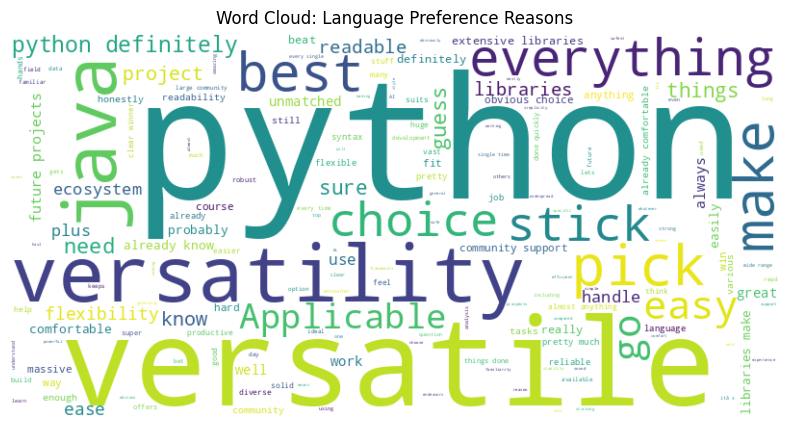

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df["If you could only use one of these three languages for all future projects, which would you choose and why?"].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: Language Preference Reasons")
plt.show()


In [57]:
fig = px.violin(
    df,
    y='How many years of programming experience do you have?',
    x='Which language do you use most frequently?',
    box=True,
    points='all',
    title="Experience Distribution by Preferred Language"
)
fig.show()



In [58]:
funnel_df = pd.DataFrame({
    "Stage": ["Perceived Future Dominance", "Most Used", "Recommended for Entry"],
    "Python": [
        (df['Which language do you think will dominate the job market in the next 5 years?'] == 'Python').sum(),
        (df['Which language do you use most frequently?'] == 'Python').sum(),
        (df['Which language would you recommend for someone entering your industry?'] == 'Python').sum()
    ],
    "Java": [
        (df['Which language do you think will dominate the job market in the next 5 years?'] == 'Java').sum(),
        (df['Which language do you use most frequently?'] == 'Java').sum(),
        (df['Which language would you recommend for someone entering your industry?'] == 'Java').sum()
    ]
})

fig = px.funnel(funnel_df, x='Python', y='Stage', title="Python Adoption Funnel")
fig.show()

fig = px.funnel(funnel_df, x='Java', y='Stage', title="Java Adoption Funnel")
fig.show()


In [59]:
nodes = ['0-2 yrs exp', '3-5 yrs exp', '6+ yrs exp', 
         'Python', 'Java', 'R', 
         'Data Science', 'Web Dev', 'Enterprise']

# Source, target, value
links = [
    [0, 3, 15], [0, 4, 5], [0, 5, 8],  # Experience to language
    [1, 3, 20], [1, 4, 15], [1, 5, 10],
    [2, 3, 25], [2, 4, 20], [2, 5, 5],
    [3, 6, 30], [3, 7, 20], [3, 8, 10],  # Language to industry
    [4, 6, 5], [4, 7, 15], [4, 8, 20],
    [5, 6, 15], [5, 7, 3], [5, 8, 5]
]

source = [link[0] for link in links]
target = [link[1] for link in links]
value = [link[2] for link in links]

fig2 = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,
        color=['rgba(31, 119, 180, 0.8)', 'rgba(31, 119, 180, 0.8)', 'rgba(31, 119, 180, 0.8)',
               'rgba(255, 127, 14, 0.8)', 'rgba(44, 160, 44, 0.8)', 'rgba(214, 39, 40, 0.8)',
               'rgba(148, 103, 189, 0.8)', 'rgba(148, 103, 189, 0.8)', 'rgba(148, 103, 189, 0.8)']
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
)])

fig2.update_layout(
    title_text="Developer Journey: Experience → Language → Industry",
    font_size=12
)

fig2.show()  # Uncomment to show the figure

In [60]:
import numpy as np # Needed for some transformations
import plotly.graph_objects as go


rating_map = {
    'Very Low': 1, 'Low': 2, 'Moderate': 3, 'High': 4, 'Very High': 5,
    'Very Difficult': 5, 'Difficult': 4, 'Moderate': 3, 'Easy': 2, 'Very Easy': 1,
    'Poor': 1, 'Adequate': 2, 'Good': 3, 'Excellent': 4, 'Outstanding': 5,
    'Never': 1, 'Rarely': 2, 'Sometimes': 3, 'Often': 4, 'Always': 5,
    'Strongly Disagree': 1, 'Disagree': 2, 'Neutral': 3, 'Agree': 4, 'Strongly Agree': 5
    # Add more mappings as needed for your specific columns
}

perception_cols = [
    'Python_Community_Support', 'Python_Optimization_Challenges', 'Python_Learning_Challenges',
    'Java_Community_Support', 'Java_Optimization_Challenges', 'Java_Learning_Challenges',
    'R_Community_Support', 'R_Optimization_Challenges', 'R_Learning_Challenges',
    'Python_Execution_Speed', 'R_Execution_Speed', 'Java_Execution_Speed',
    'Python_Ease_of_Use', 'R_Ease_of_Use', 'Java_Ease_of_Use',
    'Python_Documentation', 'R_Documentation', 'Java_Documentation',
    'Python_Concurrency_Features', 'R_Concurrency_Features', 'Java_Concurrency_Features',
    'Python_Readability', 'R_Readability', 'Java_Readability'
]

for col in perception_cols:
    # Check if the column exists before trying to map
    if col in df.columns:
         # Map, coercing errors to NaN (for values not in your map)
        df[col.replace('_', '_Numerical_')] = df[col].map(rating_map).astype(float)
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")


In [61]:
experience_col = 'How many years of programming experience do you have?'
if experience_col in df.columns:
    # Convert to numeric, handling potential errors (e.g., text entries)
    # You might need a more sophisticated approach depending on your data
    df['Years_Experience_Numeric'] = pd.to_numeric(df[experience_col], errors='coerce')

    # Define bins and labels (adjust as appropriate for your data distribution)
    experience_bins = [0, 1, 3, 6, 10, 20, 50, np.inf] # Example bins
    experience_labels = ['<1 year', '1-3 years', '3-6 years', '6-10 years', '10-20 years', '20-50 years', '50+ years'] # Example labels

    # Create binned category, including NaN for values that couldn't be converted
    df['Experience_Binned'] = pd.cut(df['Years_Experience_Numeric'], bins=experience_bins, labels=experience_labels, right=False, include_lowest=True)
    # Fill NaN experience with a category like 'Unknown' if preferred
    df['Experience_Binned'] = df['Experience_Binned'].cat.add_categories('Unknown').fillna('Unknown')


# Example: Cleaning Task Preference columns
task_cols_raw = [
    '  Which language do you prefer for the following tasks?   [Data Science & Machine Learning]',
    '  Which language do you prefer for the following tasks?   [Web Development]',
    '  Which language do you prefer for the following tasks?   [Mobile App Development]',
    '  Which language do you prefer for the following tasks?   [Enterprise Applications]',
    '  Which language do you prefer for the following tasks?   [Statistical Analysis]'
]
# Create cleaned column names
task_cols_cleaned = [col.split('[')[-1].replace(']', '').strip() for col in task_cols_raw]
task_col_map = dict(zip(task_cols_raw, task_cols_cleaned))

# Rename columns for easier use
df = df.rename(columns=task_col_map)


# Example: Extracting just the language from the "only one language" column
only_one_col = 'If you could only use one of these three languages for all future projects, which would you choose and why?'
if only_one_col in df.columns:
     # Assuming the format is "Language - reason"
    df['Only_One_Language'] = df[only_one_col].str.split(' - ', n=1).str[0].str.strip()
    # Handle potential NaN values
    df['Only_One_Language'] = df['Only_One_Language'].fillna('Unknown')


# Example: Clean 'What is your age?' - Assuming ranges like '25-34', '35-44', etc.
age_col = 'What is your age?'
if age_col in df.columns:
    # You might want to order these categories if they are strings like '18-24', '25-34', etc.
    # df[age_col] = pd.Categorical(df[age_col], categories=['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'], ordered=True) # Adjust categories

    # Or, if you want a numeric midpoint for some plots (less likely needed for Plotly categories)
    def age_range_to_midpoint(age_str):
        if isinstance(age_str, str):
            try:
                if '<' in age_str: return int(age_str.replace('<','').strip()) - 1 # e.g., <18 becomes 17
                if '+' in age_str: return int(age_str.replace('+','').strip()) + 5 # e.g., 65+ becomes 70 (arbitrary midpoint)
                low, high = map(int, age_str.split('-'))
                return (low + high) / 2
            except:
                return np.nan
        return np.nan
    df['Age_Midpoint'] = df[age_col].apply(age_range_to_midpoint)


# Example: Basic cleaning for key categorical columns (fill NaN, strip whitespace)
categorical_cols_to_clean = [
    'What is your gender?',
    'Which language do you use most frequently?',
    'Which language do you perceive as the most efficient for your tasks?',
    'Which language do you think will dominate the job market in the next 5 years?',
    'Which language was the easiest for you to learn?',
    'Which language has the most beginner-friendly documentation and learning resources?',
    'In your field, which language is the most commonly used?',
    'Which language do you believe is most in demand for jobs?',
    'Which language would you recommend for someone entering your industry?',
    'Have you ever contributed to an open-source project in any of these languages?',
    'extracted_job',
    'general_role'
]
for col in categorical_cols_to_clean:
     if col in df.columns:
        df[col] = df[col].fillna('Unknown').astype(str).str.strip()

# You will need to handle 'Languages_Used' multi-select separately if you want combinations.
# For now, we'll primarily use 'Which language do you use most frequently?' for language focus.

In [62]:
df

,id,What is your age?,What is your gender?,What is your current major or job field?,What is your current role?,How many years of programming experience do you have?,Languages_Used,Python_Community_Support,Python_Optimization_Challenges,Python_Learning_Challenges,...,Python_Numerical_Concurrency_Numerical_Features,R_Numerical_Concurrency_Numerical_Features,Java_Numerical_Concurrency_Numerical_Features,Python_Numerical_Readability,R_Numerical_Readability,Java_Numerical_Readability,Years_Experience_Numeric,Experience_Binned,Only_One_Language,Age_Midpoint
0,1,18-24,Female,data science is my current gig mostly using py...,Student,1-3 years,Python,5.0,slow speed and memory management issues can be...,understanding modules and imports initially to...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,python easily that's my go-to i can get things...,21.0
1,2,18-24,Female,i'm working in data science right now using py...,Student,1-3 years,Python,4.0,libraries not always optimized enough,initially grasping python's syntax and then th...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,python of course its versatility beats the oth...,21.0
2,3,18-24,Female,software development professionally using java...,Student,Less than 1 year,Java,NaN,Not Applicable,Not Applicable,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,java's my go-to it's versatile and reliable,21.0
3,4,18-24,Male,software engineering is my current gig i use p...,Student,1-3 years,Python,5.0,cython limitations and the global interpreter ...,list comprehension syntax takes some getting u...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,python is versatile and readable i would proba...,21.0
4,5,18-24,Male,i'm working as a software engineer and use pyt...,Student,Less than 1 year,Python,5.0,gil limitations memory bottlenecks and libraries,honestly figuring out those complex libraries ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,python is my choice its versatility and ease o...,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,Not Applicable,45+,Female,AI specialist,Researcher,7+ years,Python,5.0,Handling larg datasets efficintly,Just the beginning because I was using c at fi...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Python because it have everything i need to co...,50.0
308,Not Applicable,18-24,Male,Math Teacher,Student,Less than 1 year,Java,NaN,Not Applicable,Not Applicable,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,"As a conversational AI, I don't have personal ...",21.0
309,Not Applicable,18-24,Male,Cyber security,Student,1-3 years,Java,NaN,Not Applicable,Not Applicable,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,R,21.0
310,Not Applicable,18-24,Female,Data Science,Student,1-3 years,Java,NaN,Not Applicable,Not Applicable,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Java,21.0


In [63]:
oss_contrib_col = 'Have you ever contributed to an open-source project in any of these languages?'

plot_df = df[(df['Which language do you use most frequently?'] != 'Unknown') & (df[oss_contrib_col] != 'Unknown')].copy()

plot_df[oss_contrib_col] = plot_df[oss_contrib_col].apply(lambda x: 'Yes' if x == 'Yes' else ('No' if x == 'No' else 'Other/Unknown'))

fig = px.bar(plot_df, x='Which language do you use most frequently?', color=oss_contrib_col,
                title='Open Source Contribution Status by Most Frequent Language Used',
                labels={'Which language do you use most frequently?': 'Most Frequent Language',
                        oss_contrib_col: 'Contributed to Open Source'},
                barmode='stack')


fig.show()

In [64]:
experience_data = df[['How many years of programming experience do you have?', 
                       'Which language do you use most frequently?']]
experience_data.columns = ['Experience', 'Language']
fig = px.box(experience_data, x='Language', y='Experience', title='Programming Experience by Language Preference')
fig.show()

In [65]:
# Convert categorical ratings to numerical for some plots
ease_mapping = {'Very Easy': 5, 'Easy': 4, 'Moderate': 3, 'Hard': 2, 'Very Hard': 1}
df['Python_Ease_Score'] = df['Python_Ease_of_Use'].map(ease_mapping)
df['Java_Ease_Score'] = df['Java_Ease_of_Use'].map(ease_mapping)
df['R_Ease_Score'] = df['R_Ease_of_Use'].map(ease_mapping)

In [66]:
import plotly.express as px
import pandas as pd
fig2 = px.scatter(
    df,
    x='How many years of programming experience do you have?',
    y='How often do you switch between these languages?',
    size='How often do you seek help from online resources (e.g., Stack Overflow, official documentation)?',
    color='Which language do you perceive as the most efficient for your tasks?',
    animation_frame='What is your age?',
    hover_data=['What is your current role?', 'What is your current major or job field?'], # Corrected column name here
    title='Animated Bubble Chart: Experience vs. Language Efficiency by Age'
)

fig2.update_layout(
    xaxis_title='Years of Programming Experience',
    yaxis_title='Language Switching Frequency'
)


fig2.show()

In [67]:
import plotly.express as px
import pandas as pd
import numpy as np

# Clean the data
speed_df = df[['Python_Execution_Speed', 'R_Execution_Speed', 'Java_Execution_Speed']].replace('Not Applicable', np.nan)
speed_df = speed_df.apply(pd.to_numeric, errors='coerce')

# Calculate average speeds
avg_speeds = speed_df.mean().reset_index()
avg_speeds.columns = ['Language', 'Average_Speed']

# Plot
fig = px.bar(
    avg_speeds,
    x='Language',
    y='Average_Speed',
    color='Language',
    title='Average Execution Speed by Programming Language',
    text='Average_Speed',
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(yaxis=dict(range=[0,6]))
fig.show()

In [68]:
ease_df = df[['Python_Ease_of_Use', 'R_Ease_of_Use', 'Java_Ease_of_Use']]
import plotly.express as px
import pandas as pd
import numpy as np

# Clean the data
ease_df = ease_df.apply(pd.to_numeric, errors='coerce')

# Calculate average speeds
avg_ease = ease_df.mean().reset_index()
avg_ease.columns = ['Language', 'Average_Ease']

# Plot
fig = px.bar(
    avg_ease,
    x='Language',
    y='Average_Ease',
    color='Language',
    title='Average Ease Of Use by Programming Language',
    text='Average_Ease',
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(yaxis=dict(range=[0,6]))
fig.show()

In [69]:
doc_df = df[['Python_Documentation', 'R_Documentation', 'Java_Documentation']]
import plotly.express as px
import pandas as pd
import numpy as np

# Clean the data
doc_df = doc_df.apply(pd.to_numeric, errors='coerce')

# Calculate average speeds
avg_doc = doc_df.mean().reset_index()
avg_doc.columns = ['Language', 'Average_Doc']

# Plot
fig = px.bar(
    avg_doc,
    x='Language',
    y='Average_Doc',
    color='Language',
    title='Average Documentation by Programming Language',
    text='Average_Doc',
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(yaxis=dict(range=[0,6]))
fig.show()

In [70]:
# Select and clean concurrency columns
concurrency_df = df[['Python_Concurrency_Features', 'R_Concurrency_Features', 'Java_Concurrency_Features']]
concurrency_df = concurrency_df.apply(pd.to_numeric, errors='coerce')

# Calculate average
avg_concurrency = concurrency_df.mean().reset_index()
avg_concurrency.columns = ['Language', 'Average_Concurrency']

# Plot
fig = px.bar(
    avg_concurrency,
    x='Language',
    y='Average_Concurrency',
    color='Language',
    title='Average Concurrency Features by Programming Language',
    text='Average_Concurrency',
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(yaxis=dict(range=[0,6]))
fig.show()

In [71]:
df.head()

,id,What is your age?,What is your gender?,What is your current major or job field?,What is your current role?,How many years of programming experience do you have?,Languages_Used,Python_Community_Support,Python_Optimization_Challenges,Python_Learning_Challenges,...,Python_Numerical_Readability,R_Numerical_Readability,Java_Numerical_Readability,Years_Experience_Numeric,Experience_Binned,Only_One_Language,Age_Midpoint,Python_Ease_Score,Java_Ease_Score,R_Ease_Score
0,1,18-24,Female,data science is my current gig mostly using py...,Student,1-3 years,Python,5.0,slow speed and memory management issues can be...,understanding modules and imports initially to...,...,NaN,NaN,NaN,NaN,Unknown,python easily that's my go-to i can get things...,21.0,NaN,NaN,NaN
1,2,18-24,Female,i'm working in data science right now using py...,Student,1-3 years,Python,4.0,libraries not always optimized enough,initially grasping python's syntax and then th...,...,NaN,NaN,NaN,NaN,Unknown,python of course its versatility beats the oth...,21.0,NaN,NaN,NaN
2,3,18-24,Female,software development professionally using java...,Student,Less than 1 year,Java,NaN,Not Applicable,Not Applicable,...,NaN,NaN,NaN,NaN,Unknown,java's my go-to it's versatile and reliable,21.0,NaN,NaN,NaN
3,4,18-24,Male,software engineering is my current gig i use p...,Student,1-3 years,Python,5.0,cython limitations and the global interpreter ...,list comprehension syntax takes some getting u...,...,NaN,NaN,NaN,NaN,Unknown,python is versatile and readable i would proba...,21.0,NaN,NaN,NaN
4,5,18-24,Male,i'm working as a software engineer and use pyt...,Student,Less than 1 year,Python,5.0,gil limitations memory bottlenecks and libraries,honestly figuring out those complex libraries ...,...,NaN,NaN,NaN,NaN,Unknown,python is my choice its versatility and ease o...,21.0,NaN,NaN,NaN


In [72]:
# Select and clean readability columns
readability_df = df[['Python_Readability', 'R_Readability', 'Java_Readability']]
readability_df = readability_df.apply(pd.to_numeric, errors='coerce')

# Calculate average
avg_readability = readability_df.mean().reset_index()
avg_readability.columns = ['Language', 'Average_Readability']

# Plot
fig = px.bar(
    avg_readability,
    x='Language',
    y='Average_Readability',
    color='Language',
    title='Average Readability by Programming Language',
    text='Average_Readability',
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(yaxis=dict(range=[0,6]))
fig.show()

In [73]:
df.columns

Index(['id', 'What is your age?', 'What is your gender?',
       'What is your current major or job field?',
       'What is your current role?',
       'How many years of programming experience do you have?',
       'Languages_Used', 'Python_Community_Support',
       'Python_Optimization_Challenges', 'Python_Learning_Challenges',
       'Java_Community_Support', 'Java_Optimization_Challenges',
       'Java_Learning_Challenges', 'R_Community_Support',
       'R_Optimization_Challenges', 'R_Learning_Challenges',
       'Which language do you use most frequently?',
       'Data Science & Machine Learning', 'Web Development',
       'Mobile App Development', 'Enterprise Applications',
       'Statistical Analysis',
       'How often do you switch between these languages?',
       'Which language do you perceive as the most efficient for your tasks?',
       'Python_Execution_Speed', 'R_Execution_Speed', 'Java_Execution_Speed',
       'Python_Ease_of_Use', 'R_Ease_of_Use', 'Java_Ease_of_U